## Data Load

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image 
import glob
import os

In [3]:
# 사이즈 변경
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일 사이즈로 바꾸어 저장
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")


1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료
1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료
1271  images to be resized.
1271  images resized.
보 이미지 resize 완료


In [4]:
# 데이터 라벨링 및 분리
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/all_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/all_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/all_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 64, 64, 3)
y_train shape: (3676,)


라벨:  1


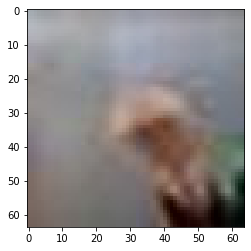

In [5]:
# 라벨링 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[1230])
print('라벨: ', y_train[1230])

## Baseline

In [6]:
# modeling
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

Epoch 1/10
115/115 [==============================] - 13s 110ms/step - loss: 10.1867 - accuracy: 0.6640
Epoch 2/10
115/115 [==============================] - 13s 110ms/step - loss: 0.1306 - accuracy: 0.9576
Epoch 3/10
115/115 [==============================] - 13s 110ms/step - loss: 0.0306 - accuracy: 0.9929
Epoch 4/10
115/115 [==============================] - 13s 110ms/step - loss: 0.0047 - accuracy: 0.9995
Epoch 5/10
115/115 [==============================] - 13s 110ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/10
115/115 [==============================] - 13s 113ms/step - loss: 5.0245e-04 - accuracy: 1.0000
Epoch 7/10
115/115 [==============================] - 13s 111ms/step - loss: 3.1682e-04 - accuracy: 1.0000
Epoch 8/10
115/115 [==============================] - 13s 112ms/step - loss: 2.3138e-04 - accuracy: 1.0000
Epoch 9/10
115/115 [==============================] - 13s 111ms/step - loss: 1.8277e-04 - accuracy: 1.0000
Epoch 10/10
115/115 [==============================] - 1

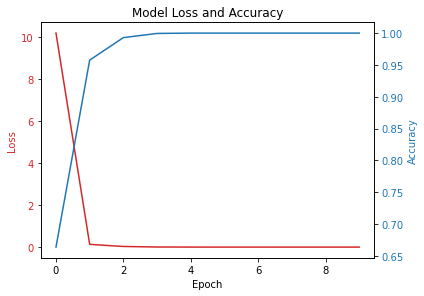

In [7]:
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() # 그래프 표시

시로 시작되어 과적합이 의심됩니다.

In [8]:
# test data
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

def test_load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_test, y_test)=test_load_data(image_dir_path)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

635  images to be resized.
635  images resized.
675  images to be resized.
675  images resized.
648  images to be resized.
648  images resized.
학습데이터(x_train)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 64, 64, 3)
y_test shape: (1958,)


In [9]:
# 결과 저장
test_losses = []
test_accuracies = []

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)
    
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 2s - loss: 7.5579 - accuracy: 0.3427
test_loss: 7.557929515838623 
test_accuracy: 0.3426966369152069


In [10]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.1746677e-09 9.9999845e-01 1.5832799e-06]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.01009909 0.01069544 0.9792054 ]
라벨: 0, 예측결과: 2


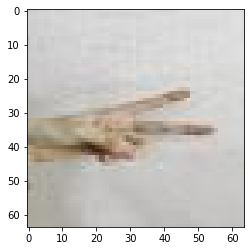

예측확률분포: [3.8118567e-03 6.2167269e-06 9.9618196e-01]
라벨: 1, 예측결과: 2


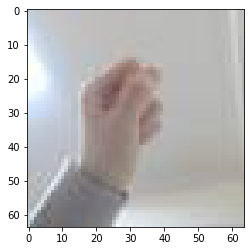

예측확률분포: [0.65788585 0.0115551  0.3305591 ]
라벨: 1, 예측결과: 0


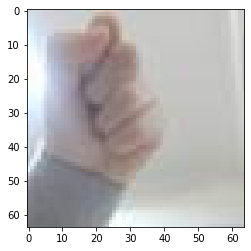

예측확률분포: [0.72357666 0.01784211 0.25858125]
라벨: 1, 예측결과: 0


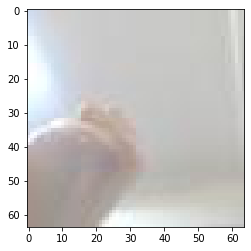

예측확률분포: [6.9512398e-04 2.1347942e-07 9.9930465e-01]
라벨: 1, 예측결과: 2


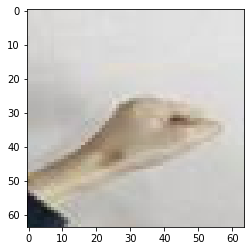

예측확률분포: [1.18104666e-07 1.02513056e-08 9.99999881e-01]
라벨: 0, 예측결과: 2


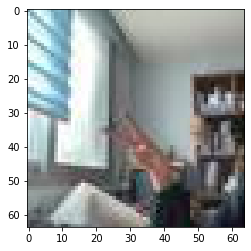

예측확률분포: [5.267678e-06 2.154958e-07 9.999945e-01]
라벨: 0, 예측결과: 2


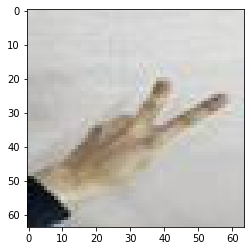

예측확률분포: [0.78193754 0.00479821 0.21326423]
라벨: 1, 예측결과: 0


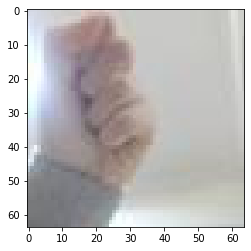

예측확률분포: [9.5558546e-02 3.0513636e-05 9.0441096e-01]
라벨: 0, 예측결과: 2


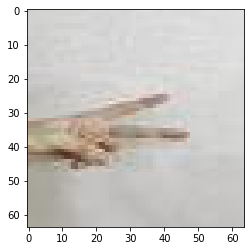

예측확률분포: [9.7569317e-01 1.4816140e-07 2.4306733e-02]
라벨: 2, 예측결과: 0


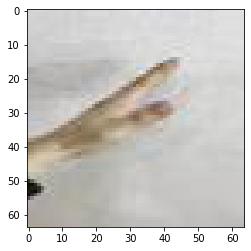

In [11]:
# 오답 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

학습시 Epoch 2에서 급격하게 accuracy가 1에 가까워졌으며 test_accuracy는 0.34로 낮은 점수로 확인되어 과적합이 의심됩니다.

## Tuning_1

- Dropout : 0.25, 0.5로 Dense layers에 더 높게 설정
- Early Stopping : 3 epochs 동안 개선되지 않으면 자동 종료


In [12]:
# modeling
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10


model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),  # 드롭아웃 추가
    keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

Epoch 1/10
115/115 [==============================] - 14s 121ms/step - loss: 2.2955 - accuracy: 0.3501
Epoch 2/10
115/115 [==============================] - 14s 121ms/step - loss: 1.0622 - accuracy: 0.3482
Epoch 3/10
115/115 [==============================] - 14s 123ms/step - loss: 1.0709 - accuracy: 0.3526
Epoch 4/10
115/115 [==============================] - 14s 122ms/step - loss: 1.0598 - accuracy: 0.3547
Epoch 5/10
115/115 [==============================] - 14s 122ms/step - loss: 1.0885 - accuracy: 0.3534
Epoch 6/10
115/115 [==============================] - 14s 121ms/step - loss: 1.0975 - accuracy: 0.3504
Epoch 7/10
115/115 [==============================] - 14s 121ms/step - loss: 1.0970 - accuracy: 0.3504
Epoch 8/10
115/115 [==============================] - 14s 120ms/step - loss: 1.0968 - accuracy: 0.3504
Epoch 9/10
115/115 [==============================] - 14s 122ms/step - loss: 1.0968 - accuracy: 0.3504
Epoch 10/10
115/115 [==============================] - 14s 122ms/step - l

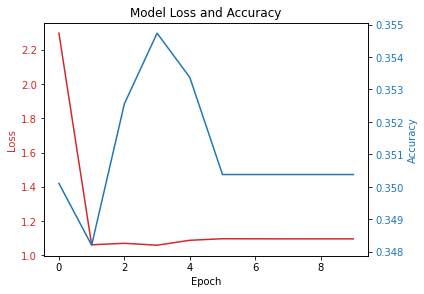

In [13]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [14]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 2s - loss: 1.0992 - accuracy: 0.3447
test_loss: 1.0991640090942383 
test_accuracy: 0.34473952651023865


In [15]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.30537215 0.3506059  0.34402192]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 0, 예측결과: 1


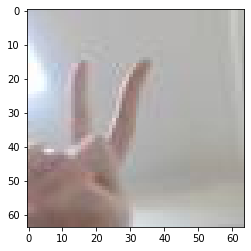

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 2, 예측결과: 1


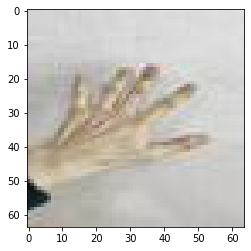

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 0, 예측결과: 1


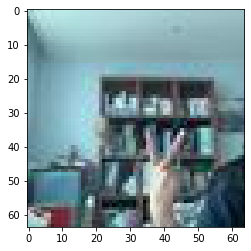

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 2, 예측결과: 1


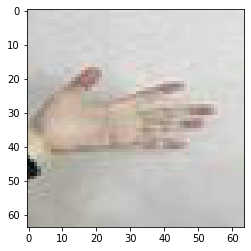

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 2, 예측결과: 1


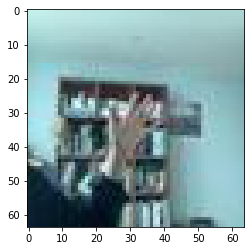

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 2, 예측결과: 1


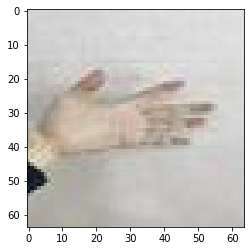

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 2, 예측결과: 1


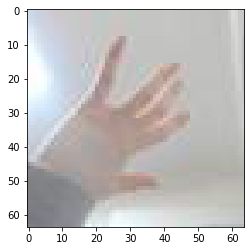

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 0, 예측결과: 1


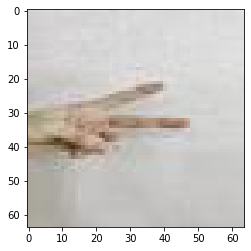

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 0, 예측결과: 1


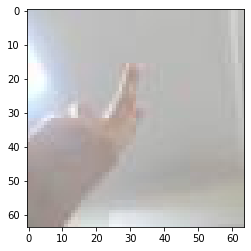

예측확률분포: [0.30537215 0.3506059  0.34402192]
라벨: 0, 예측결과: 1


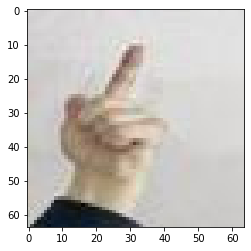

In [16]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

모델의 성능이 개선되지 않고 정확도가 낮은 상태로 정체되어 모델 구조 개선이 필요해보입니다.

## Tuning_2

- Conv2D, MaxPooling2D 추가
- dense 64 -> 128

In [17]:
# modeling
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'), # 추가된 층
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), # 뉴런 수 증가
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)        

Epoch 1/10
115/115 [==============================] - 32s 272ms/step - loss: 6.0134 - accuracy: 0.3819
Epoch 2/10
115/115 [==============================] - 32s 277ms/step - loss: 0.9926 - accuracy: 0.4750
Epoch 3/10
115/115 [==============================] - 32s 276ms/step - loss: 0.8661 - accuracy: 0.5813
Epoch 4/10
115/115 [==============================] - 32s 277ms/step - loss: 0.6954 - accuracy: 0.6945
Epoch 5/10
115/115 [==============================] - 32s 277ms/step - loss: 0.5709 - accuracy: 0.7655
Epoch 6/10
115/115 [==============================] - 32s 275ms/step - loss: 0.4503 - accuracy: 0.8256
Epoch 7/10
115/115 [==============================] - 32s 278ms/step - loss: 0.3401 - accuracy: 0.8648
Epoch 8/10
115/115 [==============================] - 32s 277ms/step - loss: 0.2776 - accuracy: 0.8939
Epoch 9/10
115/115 [==============================] - 32s 279ms/step - loss: 0.2135 - accuracy: 0.9146
Epoch 10/10
115/115 [==============================] - 32s 278ms/step - l

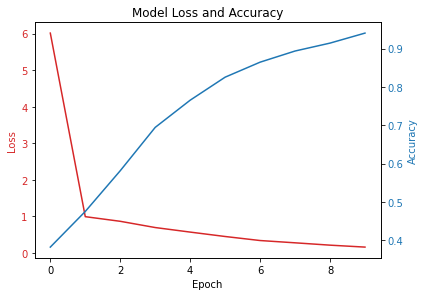

In [18]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)


# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [19]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 4s - loss: 1.7577 - accuracy: 0.4852
test_loss: 1.757730484008789 
test_accuracy: 0.48518896102905273


In [20]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9973017e-01 1.8997640e-05 2.5083811e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [0.14876384 0.00186755 0.8493686 ]
라벨: 0, 예측결과: 2


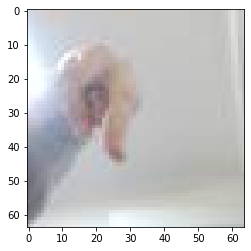

예측확률분포: [0.014654   0.00720367 0.9781423 ]
라벨: 1, 예측결과: 2


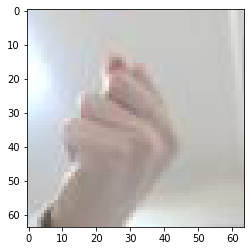

예측확률분포: [0.44856775 0.19687328 0.35455894]
라벨: 2, 예측결과: 0


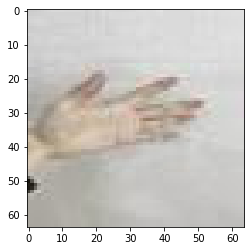

예측확률분포: [0.4713156  0.15280287 0.3758815 ]
라벨: 2, 예측결과: 0


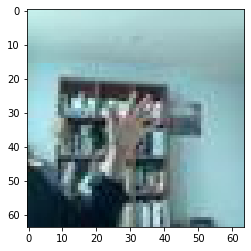

예측확률분포: [2.423260e-04 6.277948e-07 9.997570e-01]
라벨: 1, 예측결과: 2


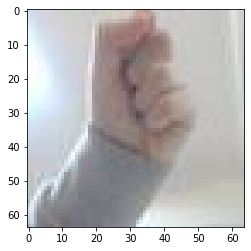

예측확률분포: [5.7253476e-02 1.1097580e-06 9.4274539e-01]
라벨: 0, 예측결과: 2


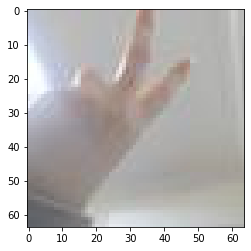

예측확률분포: [1.8255465e-05 2.9353607e-02 9.7062814e-01]
라벨: 1, 예측결과: 2


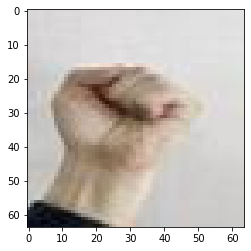

예측확률분포: [4.5086148e-01 9.6680255e-05 5.4904187e-01]
라벨: 0, 예측결과: 2


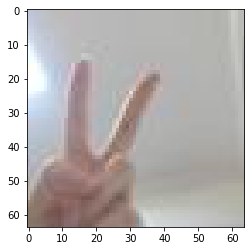

예측확률분포: [0.3382348  0.36636615 0.29539907]
라벨: 2, 예측결과: 1


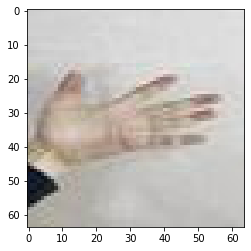

예측확률분포: [0.04121149 0.0048213  0.9539673 ]
라벨: 0, 예측결과: 2


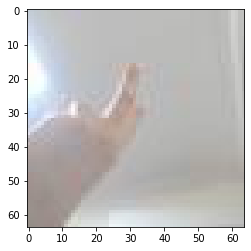

In [21]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

모델 구조를 변경하며 Epoch가 상승함에 따라 accuracy가 점차적으로 높아지며 안정화가 된 것으로 보여집니다. <br/>
test_accuracy: 0.48로 baseline보다 점수가 상승했으나 아직도 과적합이 있는 것으로 보여집니다.

## Tuning_3

- Data Augmentation 추가
- Batch Normalization 추가

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 회전 범위
    width_shift_range=0.2, # 수평 이동 범위
    height_shift_range=0.2, # 수직 이동 범위
    shear_range=0.2, # 전단 변형 범위
    zoom_range=0.2, # 확대 축소 범위
    horizontal_flip=True, # 수평 뒤집기 적용
    fill_mode='nearest' # 변형 시 채우기 모드
)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(), # 배치 정규화 추가
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])



Epoch 1/10
114/114 [==============================] - 47s 406ms/step - loss: 1.2755 - accuracy: 0.4929
Epoch 2/10
114/114 [==============================] - 47s 407ms/step - loss: 0.8638 - accuracy: 0.6069
Epoch 3/10
114/114 [==============================] - 46s 404ms/step - loss: 0.7553 - accuracy: 0.6714
Epoch 4/10
114/114 [==============================] - 46s 396ms/step - loss: 0.7126 - accuracy: 0.6872
Epoch 5/10
114/114 [==============================] - 45s 394ms/step - loss: 0.6528 - accuracy: 0.7130
Epoch 6/10
114/114 [==============================] - 45s 394ms/step - loss: 0.5663 - accuracy: 0.7636
Epoch 7/10
114/114 [==============================] - 45s 395ms/step - loss: 0.5545 - accuracy: 0.7756
Epoch 8/10
114/114 [==============================] - 45s 393ms/step - loss: 0.5183 - accuracy: 0.7870
Epoch 9/10
114/114 [==============================] - 45s 393ms/step - loss: 0.4743 - accuracy: 0.8006
Epoch 10/10
114/114 [==============================] - 45s 393ms/step - l

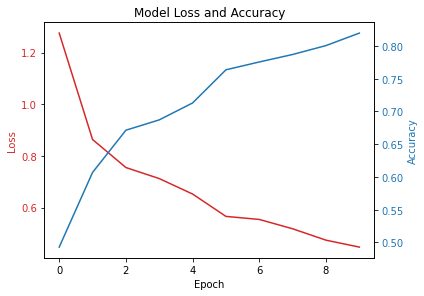

In [25]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# 모델 훈련 시 데이터 증강 사용
# .fit 대신 .fit_generator 사용
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    epochs=n_train_epoch,
    callbacks=[early_stopping]
)

# 시각화
fig, ax1 = plt.subplots() 

color = 'tab:red' 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss', color=color) 
ax1.plot(history.history['loss'], color=color) 
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()  
color = 'tab:blue' 
ax2.set_ylabel('Accuracy', color=color) 
ax2.plot(history.history['accuracy'], color=color) 
ax2.tick_params(axis='y', labelcolor=color) 

fig.tight_layout() 
plt.title('Model Loss and Accuracy')
plt.show() 

In [26]:
# 결과 저장

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 5s - loss: 3.4329 - accuracy: 0.5128
test_loss: 3.4329397678375244 
test_accuracy: 0.5127681493759155


In [27]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.2141922e-03 9.9874687e-01 3.8927956e-05]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.3615161  0.63500196 0.00348185]
라벨: 2, 예측결과: 1


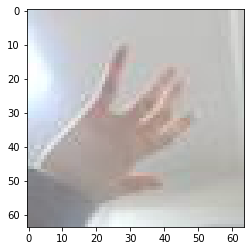

예측확률분포: [6.4510312e-03 9.9354726e-01 1.6496818e-06]
라벨: 2, 예측결과: 1


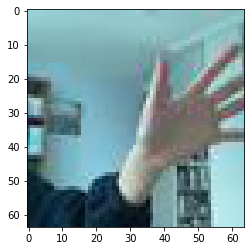

예측확률분포: [0.59310126 0.3591591  0.04773959]
라벨: 2, 예측결과: 0


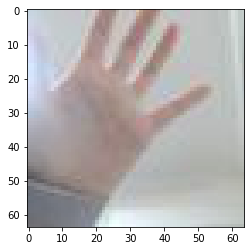

예측확률분포: [1.2341816e-03 9.9876332e-01 2.5454424e-06]
라벨: 2, 예측결과: 1


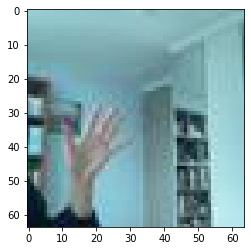

예측확률분포: [5.4037869e-03 9.9457425e-01 2.1991758e-05]
라벨: 0, 예측결과: 1


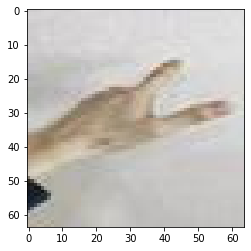

예측확률분포: [0.16222371 0.82302135 0.01475496]
라벨: 2, 예측결과: 1


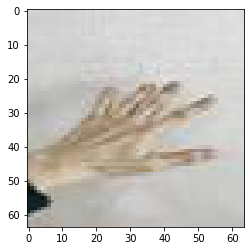

예측확률분포: [1.4596273e-03 9.9853933e-01 1.1150744e-06]
라벨: 2, 예측결과: 1


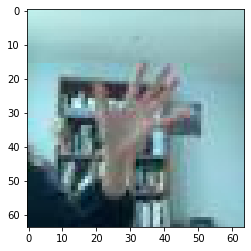

예측확률분포: [0.71757257 0.20076779 0.08165965]
라벨: 2, 예측결과: 0


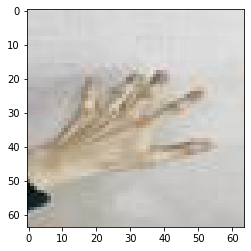

예측확률분포: [0.29682058 0.70236236 0.00081699]
라벨: 2, 예측결과: 1


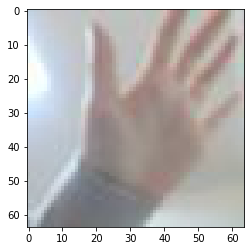

예측확률분포: [2.0481035e-02 9.7951335e-01 5.5844816e-06]
라벨: 2, 예측결과: 1


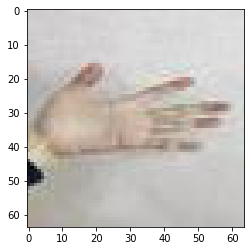

In [28]:
# 오답 확인
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고

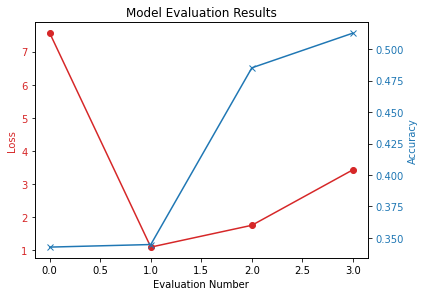

In [29]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Evaluation Number')
ax1.set_ylabel('Loss', color=color)
ax1.plot(test_losses, color=color, marker='o', label='Test Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(test_accuracies, color=color, marker='x', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Evaluation Results')
plt.show()

손글씨 0,1,2,3,4,5,6,7,8,9을 분류하는 것보다 가위바위보 3가지를 분류해 내는 것이 더 어려울 것이라는 생각은 하지 못했다.<br/>
학습 데이터량도 적고 로우 데이터를 찾아봤을 때 사진 촬영 환경이 다양하고 노이즈도 많은 것이 영향이 컸을 것 같다.<br/>
tuning을 진행할 때마다 모델의 성능은 점차 높아졌지만 loss율이 상승했고 과적합이 생각보다 잘 잡히지 않아 아쉬운 결과였다.<br/>
<br/>

- Image Size :

64 > 128 > 28 순서로 64로 설정했을 때 가장 좋은 성능을 보였다.<br/>
이미지 사이즈가 너무 높아도 오히려 학습에 방해가 될 수 있다는 것을 알았다.

- dense : 

학습 Accuracy 상태가 저조할 때는 뉴런을 증가시키는 것이 효과가 좋았다.

- ImageDataGenerator : 

데이터 과적합 현상이 있을 때 데이터 증강이 일반화 성능을 높일 수 있다는 것을 체감했다.<br/>
ImageDataGenerator 파라미터를 조정하면 더 좋은 성과를 낼 수 있을 것 같다.